In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
#Reading the csv file into the dataFrame
df = pd.read_csv('/Users/Manan/churn/BankCustomers.csv')
df.head(7)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0


In [3]:
#To know some useful details
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Data Preprocessing

In [5]:
#to know the number of rows and columns
df.shape

(10000, 14)

In [6]:
df = df.drop(labels=['RowNumber','CustomerId','Surname'],axis=1)

In [7]:
df.info()  #So, after removing unneccasry columns, we have to predict whether the customer will churn or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
df.isnull().sum()  #So, no null or na values in this dataset

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
(df['Balance']==0).value_counts()

False    6383
True     3617
Name: Balance, dtype: int64

In [10]:
(df['EstimatedSalary']==0).value_counts()

False    10000
Name: EstimatedSalary, dtype: int64

In [11]:
#Replacing zeros to the mean values of Balance column
nonzero_mean = df[ df['Balance'] != 0 ].mean()
df.loc[ df['Balance'] == 0, "Balance" ] = nonzero_mean['Balance']

In [12]:
df['Balance'].head(7)

0    119827.493793
1     83807.860000
2    159660.800000
3    119827.493793
4    125510.820000
5    113755.780000
6    119827.493793
Name: Balance, dtype: float64

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Geography']=le.fit_transform(df['Geography'])
df['Gender']=le.fit_transform(df['Gender'])

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,119827.493793,1,1,1,101348.88,1
1,608,2,0,41,1,83807.860000,1,0,1,112542.58,0
2,502,0,0,42,8,159660.800000,3,1,0,113931.57,1
3,699,0,0,39,1,119827.493793,2,0,0,93826.63,0
4,850,2,0,43,2,125510.820000,1,1,1,79084.10,0


In [15]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [16]:
#percentage to bank customer leaving
retained = df[df['Exited']==0].shape[0]
leaved = df[df['Exited']==1].shape[0]
print(leaved/(leaved+retained)*100,"% customers leaved the bank")
print(retained/(leaved+retained)*100,"% customers stayed the bank")

20.369999999999997 % customers leaved the bank
79.63 % customers stayed the bank


In [17]:
leaved

2037

In [19]:
# Outlier Observation Analysis
for feature in df[['CreditScore','Tenure', 'Balance','EstimatedSalary']]:
    
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None) or df[(df[feature] < lower)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

CreditScore no
Tenure no
Balance yes
EstimatedSalary no


# Exploratory Data Analysis

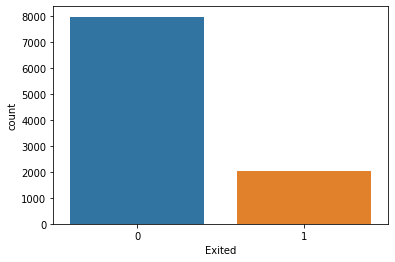

In [20]:
sb.countplot(df['Exited'])

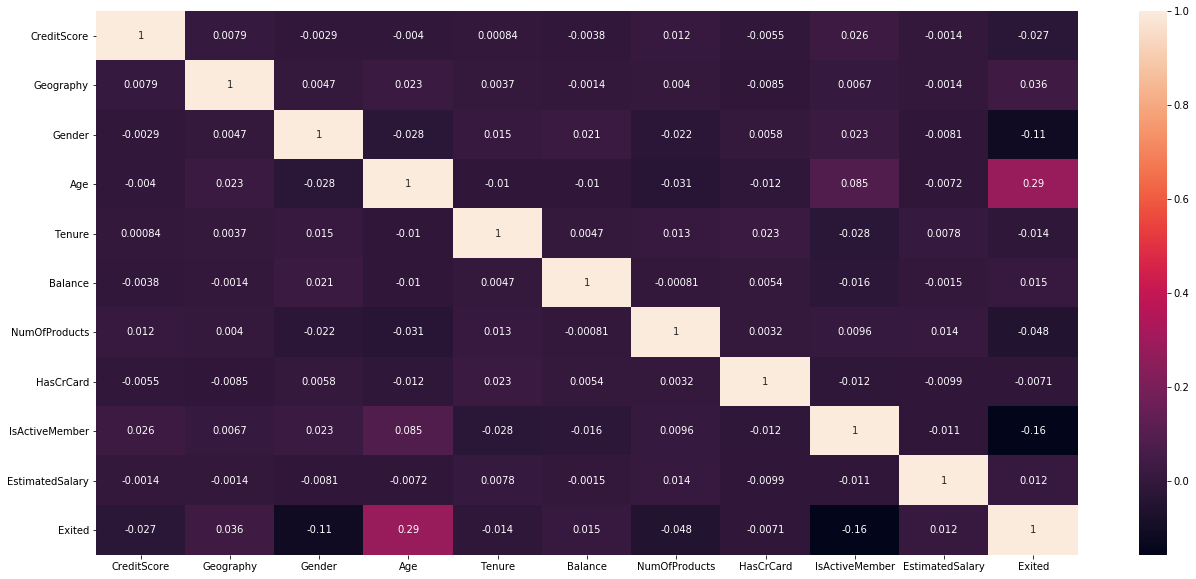

In [21]:
fig = plt.figure(figsize=(22, 10))
sb.heatmap(df.corr(),annot=True)

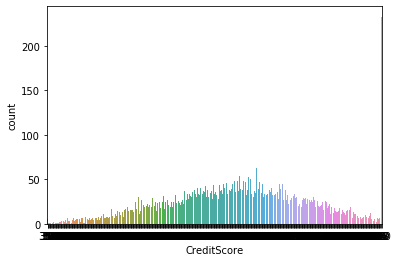

In [22]:
sb.countplot(df['CreditScore'])

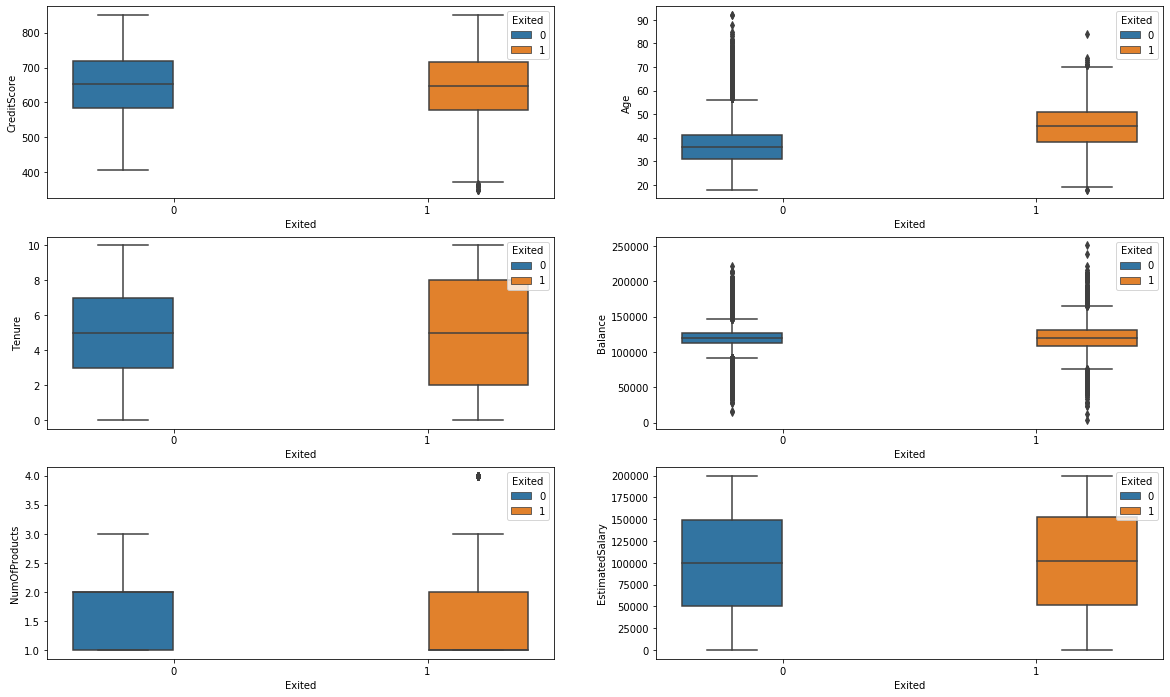

In [23]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sb.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sb.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sb.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sb.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sb.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sb.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

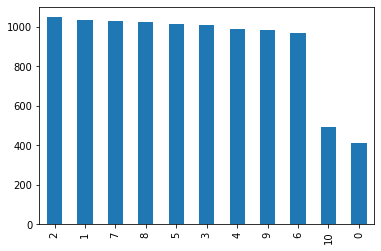

In [24]:
df['Tenure'].value_counts().plot(kind="bar")

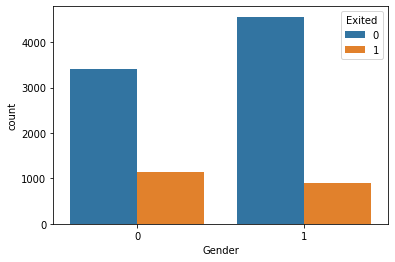

In [25]:
sb.countplot(x='Gender',hue='Exited',data=df)  #here 0 is Female and 1 is Male

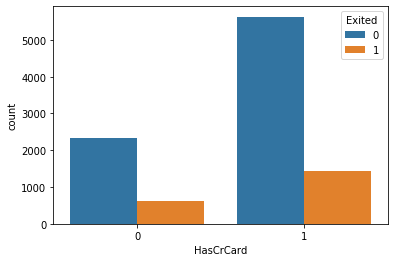

In [26]:
sb.countplot(x='HasCrCard',hue='Exited',data=df) 
#As we can see, the person with credit cards has not leaved the bank

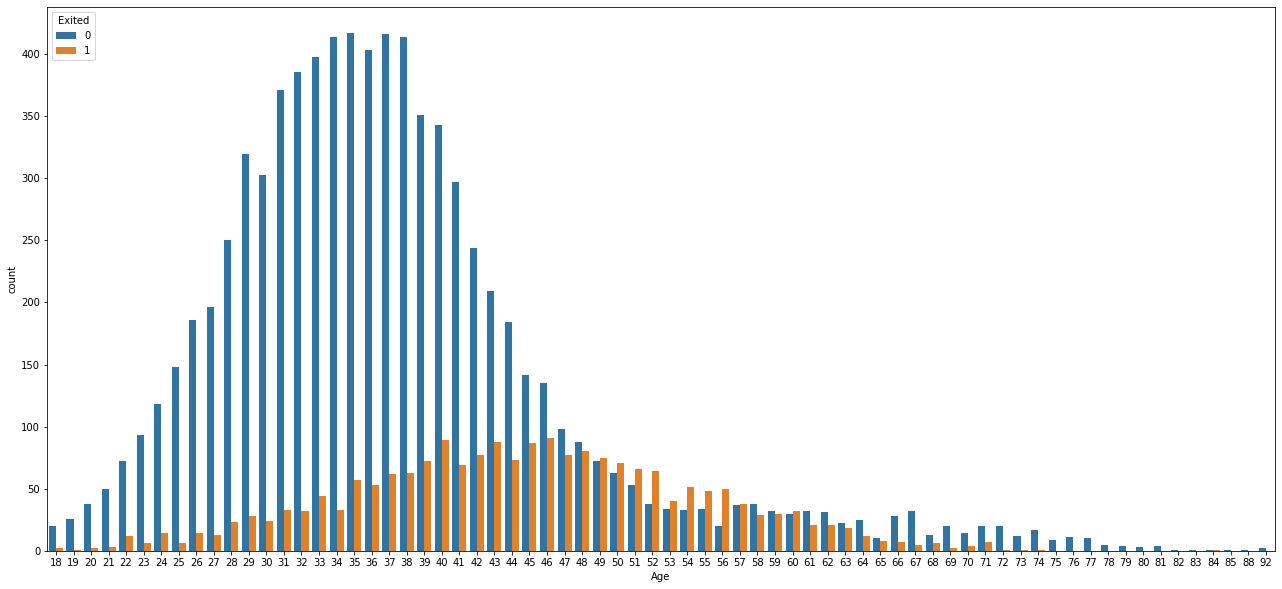

In [27]:
fig = plt.figure(figsize=(22,10))
sb.countplot(x='Age',hue='Exited',data=df) 
#So, as we can see that most people that have leaved the bank are from range (35-52 of age), and people that have not leaved the bank are from (28-44 of age)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A3C2032208>,
      dtype=object)

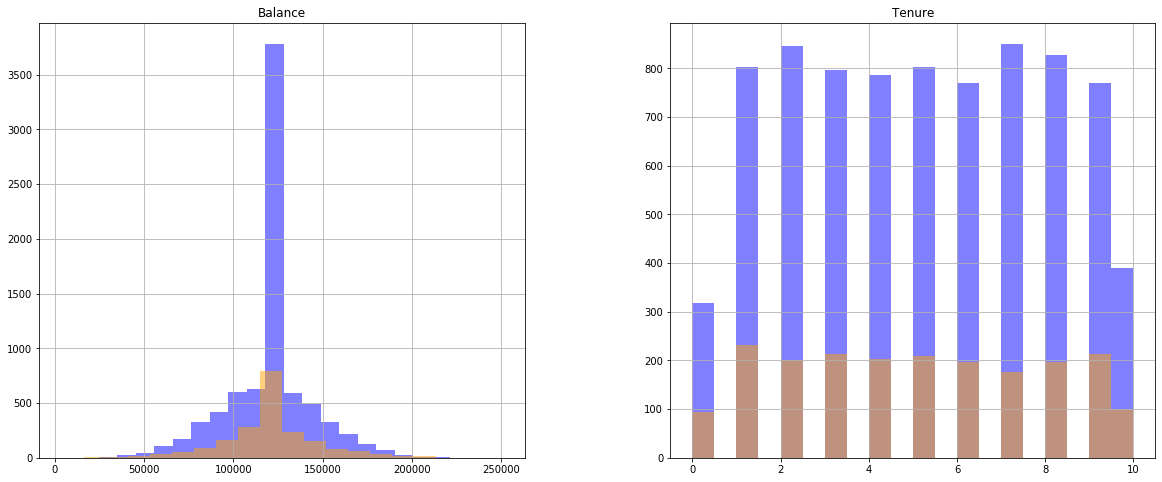

In [28]:
features = ['Tenure','Balance']
fig, ax=plt.subplots(1,2,figsize=(20,8))
df[df.Exited==0][features].hist(bins=20,color='blue',alpha=0.5,ax=ax)
df[df.Exited==1][features].hist(bins=20,color='orange',alpha=0.5,ax=ax)

#Customers with Balance between 10K and 15K in range have stayed
#Customers with tenure 1 to 9 have stayed

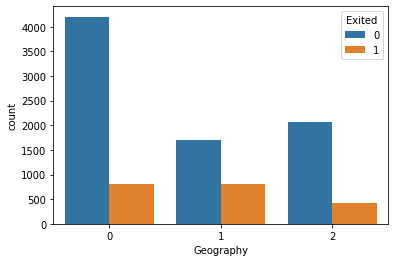

In [29]:
sb.countplot(x='Geography',hue='Exited',data=df) # means in Germany, the customer stayed with bank
#we can say that, the customers is France have leaved the bank

# Feature Engineering

In [30]:
#Creating new feature using Credit Score and Age
df['CreditScoreGivenAge'] = df.CreditScore/(df.Age)

In [ ]:
sb.distplot(x='CreditScoreGivenAge',hue='Exited',data=df) # means in Germany, the customer stayed with bank
#we can say that, the customers is France have leaved the bank

# Data Modeling

In [31]:
X = df.drop(labels=['Exited'],axis=1)
Y = df['Exited']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=42)
from imblearn.combine import SMOTETomek

smk = SMOTETomek()
# Oversample training  data
xtrain, ytrain = smk.fit_sample(xtrain, ytrain)

# Oversample validation data
xtest, ytest = smk.fit_sample(xtest, ytest)

In [32]:
xtrain.head(7)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CreditScoreGivenAge
0,632,1,1,42,4,119624.600000,2,1,1,195978.86,15.047619
1,559,2,1,24,3,114739.920000,1,1,0,85891.02,23.291667
2,561,0,0,27,9,135637.000000,1,1,0,153080.40,20.777778
3,517,0,1,56,9,142147.320000,1,0,0,39488.04,9.232143
4,569,0,1,41,4,120243.490000,1,1,0,163150.03,13.878049
5,683,0,0,40,1,119827.493793,2,0,0,75762.00,17.075000
6,759,0,0,45,8,119827.493793,2,1,1,99251.24,16.866667


(array([5512.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5512.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

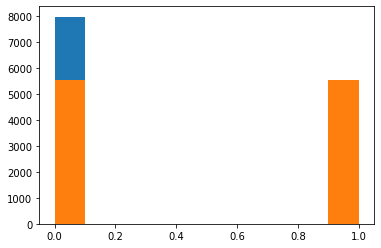

In [33]:
plt.hist(Y)
plt.hist(ytrain)

In [34]:
#Scaling the xtrain and xtest to same place values using StandardScaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xtrain_res = ss.fit_transform(xtrain)
xtest=ss.transform(xtest)

The accuracy of model is 0.7263195950831526
The precision score of model is 0.7188811188811188
The recall of model is 0.7433116413593637
[[ 981  402]
 [ 355 1028]]
              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1383
           1       0.72      0.74      0.73      1383

    accuracy                           0.73      2766
   macro avg       0.73      0.73      0.73      2766
weighted avg       0.73      0.73      0.73      2766



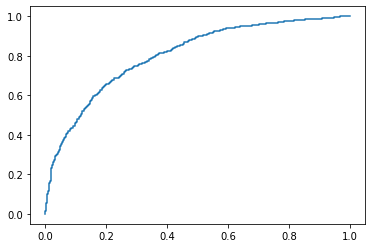

In [48]:
#So, we try different algorithm to find the best accuracy.
#First we will use Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)
pred = model.predict(xtest)

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
print("The accuracy of model is {}".format(accuracy_score(ytest,pred)))
print("The precision score of model is {}".format(precision_score(ytest,pred)))
print("The recall of model is {}".format(recall_score(ytest,pred)))

#So, with logistic regression, we are getting 72.6% accuracy

print(confusion_matrix(ytest,pred))
import sklearn.metrics as m
# calculate the fpr and tpr for all thresholds of the classification
probs = lr.predict_proba(xtest)
preds = probs[:,1]
fpr, tpr, threshold = m.roc_curve(ytest, preds)
roc_auc = m.auc(fpr, tpr)
plt.plot(fpr,tpr,roc_auc)
print(m.classification_report(ytest,pred))

<BarContainer object of 11 artists>

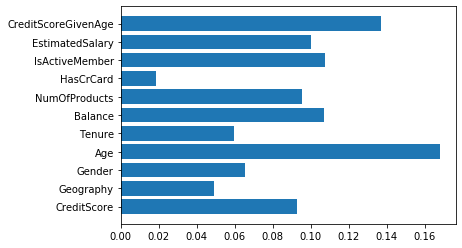

In [43]:
plt.barh(X.columns,model.feature_importances_)

In [49]:
import pickle
pickle.dump(model,open('classifier.pkl','wb'))
new_model = pickle.load(open('classifier.pkl','rb'))

In [39]:
confusion_matrix(ytest,pred)

array([[1351,  265],
       [ 127,  257]], dtype=int64)